In [1]:
import orjson
import folium
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon

In [2]:
tampa_location = [27.9547103, -82.4474036]

In [3]:
df = pd.read_csv("2019_11_5_8_thea1_in.csv", index_col=0)
df.drop(['transmission', 'steering_angle', 'accl_long', 'accl_lat', 'accl_vert', 'accl_yaw', 'wheelbrakes', 'traction', 'abs', 'scs', 'brake_boost', 'aux_brakes', 'width', 'length', 'partII'], axis=1, inplace=True)
df['car_id'] = df['car_id'].apply(lambda x: x[2:])

In [4]:
df.columns

Index(['rsu_id', 'unix_epoch', 'datetime', 'car_id', 'lat', 'long', 'elev',
       'speed', 'heading'],
      dtype='object')

In [5]:
df

,rsu_id,unix_epoch,datetime,car_id,lat,long,elev,speed,heading
15827,1,1572959887,2019-11-05 08:18:07,B71D2F,27.950971,-82.445560,-214,913,100
15842,1,1572959891,2019-11-05 08:18:11,B71D2F,27.951626,-82.445538,-217,995,132
15848,1,1572959893,2019-11-05 08:18:13,B71D2F,27.951992,-82.445525,-218,1031,184
15862,1,1572959894,2019-11-05 08:18:14,B71D2F,27.952254,-82.445516,-219,1033,168
15870,1,1572959895,2019-11-05 08:18:15,B71D2F,27.952423,-82.445509,-219,1041,158
15873,1,1572959896,2019-11-05 08:18:16,B71D2F,27.952552,-82.445504,-217,1026,149
15884,1,1572959897,2019-11-05 08:18:17,B71D2F,27.952739,-82.445497,-217,1029,208
15898,1,1572959898,2019-11-05 08:18:18,B71D2F,27.952925,-82.445488,-217,1021,213
15912,1,1572959899,2019-11-05 08:18:19,B71D2F,27.953128,-82.445480,-217,1020,153
15920,1,1572959900,2019-11-05 08:18:20,B71D2F,27.953285,-82.445474,-216,1018,146


In [6]:
# plot all the car locations
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
geometry = [Point(xy) for xy in zip(df['long'],df['lat'])]
crs = {'init': 'epsg:4326'}

In [84]:
type(geometry[0])

shapely.geometry.point.Point

In [106]:
rsuid = df['rsu_id'].values

In [114]:
folium.__version__

'0.10.1'

In [115]:
import base64

import folium

def _repr_html_(self, **kwargs):
    html = base64.b64encode(self.render(**kwargs).encode('utf8')).decode('utf8')
    onload = (
        'this.contentDocument.open();'
        'this.contentDocument.write(atob(this.getAttribute(\'data-html\')));'
        'this.contentDocument.close();'
    )
    if self.height is None:
        iframe = (
            '<div style="width:{width};">'
            '<div style="position:relative;width:100%;height:0;padding-bottom:{ratio};">'
            '<iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;'
            'border:none !important;" '
            'data-html={html} onload="{onload}" '
            'allowfullscreen webkitallowfullscreen mozallowfullscreen>'
            '</iframe>'
            '</div></div>').format
        iframe = iframe(html=html, onload=onload, width=self.width, ratio=self.ratio)
    else:
        iframe = ('<iframe src="about:blank" width="{width}" height="{height}"'
                  'style="border:none !important;" '
                  'data-html={html} onload="{onload}" '
                  '"allowfullscreen" "webkitallowfullscreen" "mozallowfullscreen">'
                  '</iframe>').format
        iframe = iframe(html=html, onload=onload, width=self.width, height=self.height)
    return iframe

folium.branca.element.Figure._repr_html_ = _repr_html_

In [118]:
## do not attempt to display folium map on jupyter for point sets over n=200, may jepordize kernel performance
m = folium.Map(location=[geometry[10].y, geometry[10].x], zoom_start=12)
for p in range(0,200):
    folium.Marker([str(geometry[p].y),str(geometry[p].x)],icon=folium.Icon(color='darkblue', icon_color='white', angle=0, prefix='fa'), popup=rsuid[p]).add_to(m)

In [119]:
m

In [9]:
geodf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geodf.head()

,rsu_id,unix_epoch,datetime,car_id,lat,long,elev,speed,heading,geometry
15827,1,1572959887,2019-11-05 08:18:07,B71D2F,27.950971,-82.445560,-214,913,100,POINT (-82.44556 27.95097)
15842,1,1572959891,2019-11-05 08:18:11,B71D2F,27.951626,-82.445538,-217,995,132,POINT (-82.44554 27.95163)
15848,1,1572959893,2019-11-05 08:18:13,B71D2F,27.951992,-82.445525,-218,1031,184,POINT (-82.44553 27.95199)
15862,1,1572959894,2019-11-05 08:18:14,B71D2F,27.952254,-82.445516,-219,1033,168,POINT (-82.44552 27.95225)
15870,1,1572959895,2019-11-05 08:18:15,B71D2F,27.952423,-82.445509,-219,1041,158,POINT (-82.44551 27.95242)


In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [13]:
df.groupby(pd.Grouper(key='datetime', freq='Min'))['car_id'].nunique()

datetime
2019-11-05 08:00:00     8
2019-11-05 08:01:00     9
2019-11-05 08:02:00    14
2019-11-05 08:03:00     9
2019-11-05 08:04:00     7
2019-11-05 08:05:00     8
2019-11-05 08:06:00    10
2019-11-05 08:07:00     9
2019-11-05 08:08:00    13
2019-11-05 08:09:00    12
2019-11-05 08:10:00     7
2019-11-05 08:11:00    10
2019-11-05 08:12:00     8
2019-11-05 08:13:00     7
2019-11-05 08:14:00     3
2019-11-05 08:15:00     5
2019-11-05 08:16:00     5
2019-11-05 08:17:00     4
2019-11-05 08:18:00     4
2019-11-05 08:19:00     3
2019-11-05 08:20:00     2
2019-11-05 08:21:00     2
2019-11-05 08:22:00     3
2019-11-05 08:23:00     4
2019-11-05 08:24:00     6
2019-11-05 08:25:00     8
2019-11-05 08:26:00     9
2019-11-05 08:27:00     8
2019-11-05 08:28:00     6
2019-11-05 08:29:00     5
2019-11-05 08:30:00     5
2019-11-05 08:31:00     8
2019-11-05 08:32:00     7
2019-11-05 08:33:00     5
2019-11-05 08:34:00     3
2019-11-05 08:35:00     1
2019-11-05 08:36:00     1
2019-11-05 08:37:00     1
201

#### Load REL interpolated representation

In [11]:
jsonfile = open("interpolated_rel.json", "r")
interpolated_rel = orjson.loads(jsonfile.read())

In [12]:
interpolated_rel

[[27.9534469, -82.4490929],
 [27.953673, -82.4490565],
 [27.9538015, -82.4490324],
 [27.95393, -82.4490029],
 [27.9540708, -82.4489596],
 [27.954214, -82.4489042],
 [27.95432855, -82.44884175],
 [27.9544431, -82.4487793],
 [27.95455175, -82.4487025],
 [27.9546604, -82.4486257],
 [27.95474795, -82.44854745],
 [27.9548355, -82.4484692],
 [27.95491355, -82.4483822],
 [27.9549916, -82.4482952],
 [27.9550673, -82.44819430000001],
 [27.955143, -82.4480934],
 [27.9552122, -82.44797435000001],
 [27.9552814, -82.4478553],
 [27.9553245, -82.44776435],
 [27.9553676, -82.4476734],
 [27.9554313, -82.4474941],
 [27.95546255, -82.44739014999999],
 [27.9554938, -82.4472862],
 [27.9555266, -82.4471421],
 [27.955551, -82.4470093],
 [27.9555638, -82.4468993],
 [27.9555713, -82.4468049],
 [27.9555776, -82.4467112],
 [27.955578000000003, -82.44663155],
 [27.9555784, -82.4465519],
 [27.95557604, -82.44644402],
 [27.95557368, -82.44633614],
 [27.95557132, -82.44622826],
 [27.95556896, -82.44612038],
 [27.955

In [13]:
# take a look at the REL locations
intp_rel= pd.DataFrame(interpolated_rel, columns=['lat','long'])

In [14]:
geometry = [Point(xy) for xy in zip(intp_rel['long'],intp_rel['lat'])]

In [15]:
geointprel = gpd.GeoDataFrame(intp_rel, crs=crs, geometry=geometry)
geointprel.head()

,lat,long,geometry
0,27.953447,-82.449093,POINT (-82.44909 27.95345)
1,27.953673,-82.449056,POINT (-82.44906 27.95367)
2,27.953802,-82.449032,POINT (-82.44903 27.95380)
3,27.953930,-82.449003,POINT (-82.44900 27.95393)
4,27.954071,-82.448960,POINT (-82.44896 27.95407)


In [ ]:
# setup box 

In [18]:
# refine the portions of express way
geointprel=geointprel.loc[geointprel['long']<-82.445]

In [17]:
# redefine cv data points to bounding box
geodf= geodf.loc[(geodf['long']<=-82.444) & (geodf['long']>=-82.45)]
geodf= geodf.loc[(geodf['lat']<=27.956) & (geodf['lat']>=27.952)]

(27.952, 27.956)

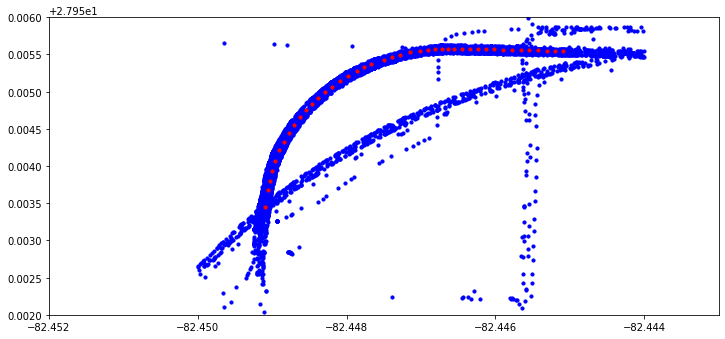

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
#street_map.plot(ax=ax, alpha = .4, color = 'grey')
geodf.plot(ax=ax, markersize=10, color='blue', marker="o")
geointprel.plot(ax=ax, markersize=10, color='red', marker="o")
plt.xlim([-82.452, -82.443])
plt.ylim([27.952, 27.956])

In [185]:
# saveout the data to a sub-portion of the 
geoptname= 'TempaExpresw_geopt.csv'
geointprel.to_csv(geoptname)

In [27]:
geoptlst=geointprel.index.values

In [25]:
geopt_tuple= [(x,y) for x,y in zip(geointprel['lat'],geointprel['long'])]

#### Coding for BST


In [21]:
def form_bst(indxlst, n):
    """The above properties of Binary Search Tree provide an ordering among keys so that the operations like search, minimum and maximum can be done fast. Use linked list."""
    
    

In [30]:
def cal_dist(pt1, pt2):
    """data given in two lists of [lat,lon], which lat/lon are doubles.
    calculate 2d-distance between points. Distance in Euclidean."""
    dist = sqrt((pt1[0]-pt2[0])^2+(pt1[1]-pt2[1])^2)
    return dist

In [33]:
for group, gdf in df.groupby(pd.Grouper(key='datetime', freq='Min')):
    print(group, gdf)
    print(gdf[['lat', 'long']].iloc[0])
    break

2019-11-05 08:00:00      rsu_id  unix_epoch            datetime  car_id        lat       long  \
8         1  1572958800 2019-11-05 08:00:00  B72AD1  27.955516 -82.443951   
0         1  1572958800 2019-11-05 08:00:00  B730B4  27.954569 -82.448734   
10        1  1572958802 2019-11-05 08:00:02  B730B4  27.954560 -82.448742   
11        1  1572958802 2019-11-05 08:00:02  B75747  27.952612 -82.451234   
15        1  1572958805 2019-11-05 08:00:05  B730B4  27.954518 -82.448773   
21        1  1572958806 2019-11-05 08:00:06  B730B4  27.954507 -82.448780   
28        1  1572958807 2019-11-05 08:00:07  B730B4  27.954486 -82.448794   
29        1  1572958808 2019-11-05 08:00:08  B730B4  27.954460 -82.448809   
34        1  1572958809 2019-11-05 08:00:09  B730B4  27.954441 -82.448820   
39        1  1572958809 2019-11-05 08:00:09  B744F5  27.952908 -82.448640   
40        1  1572958810 2019-11-05 08:00:10  B72AD1  27.955517 -82.444049   
42        1  1572958811 2019-11-05 08:00:11  B72AD1  27.

In [34]:
def create_map_with_objects(location, object_list = []):
    m = folium.Map(
        location=location,
        tiles='CartoDB positron',
        zoom_start=19
    )
    if len(object_list) > 0:
        for geo_object in object_list:
            try:
                geo_object.add_to(m)
            except:
                print("Invalid object", geo_object)
    return m

In [66]:
car_location = folium.CircleMarker([27.955516, -82.443951])

In [67]:
rel_representation = [folium.Circle(radius=1, location=point, color='crimson', fill=True) for point in interpolated_rel]

In [68]:
geo_objects = list()
geo_objects.append(car_location)
geo_objects.extend(rel_representation)

In [120]:
geo_objects = list()
for row in df.iterrows():
    geo_objects.append(folium.CircleMarker([row[1]['lat'], row[1]['long']], radius=2))

In [124]:
geo_objects[0]

In [125]:
def is_within_rel(row):
    coords = [[-82.4492249,27.9534516],[-82.4489513,27.9536601],[-82.448895,27.9539373],[-82.4488467,27.9540842],[-82.4487743,27.9542168],[-82.4486992,27.9543472],[-82.4486187,27.9544917],[-82.4484631,27.9546717],[-82.4483237,27.9548234],[-82.4481815,27.95493],[-82.4480152,27.9550485],[-82.4478731,27.9551456],[-82.4477068,27.9552167],[-82.4475512,27.9552925],[-82.4473983,27.9553493],[-82.4472722,27.9553873],[-82.4471033,27.9554228],[-82.4469611,27.9554512],[-82.4468324,27.9554702],[-82.4467251,27.955482],[-82.4465454,27.9554915],[-82.4464032,27.9554797],[-82.4432784,27.9554228],[-82.4421734,27.9553991],[-82.4403092,27.9554157],[-82.4401537,27.9554181],[-82.4401751,27.9555626],[-82.4420688,27.9555602],[-82.4439517,27.9555981],[-82.4465963,27.9556597],[-82.4469638,27.9556313],[-82.4472561,27.9555839],[-82.4475056,27.9555128],[-82.447916,27.955347],[-82.4482244,27.9551622],[-82.4484712,27.9549395],[-82.4486509,27.954757],[-82.4488816,27.9544419],[-82.4489996,27.9542097],[-82.4491122,27.9539183],[-82.4491686,27.9536601],[-82.4492249,27.9534516]]
    rel_count_zone = Polygon(coords)
    return Point(row['long'], row['lat']).within(rel_count_zone)

In [126]:
coords = [[-82.4492249,27.9534516],[-82.4489513,27.9536601],[-82.448895,27.9539373],[-82.4488467,27.9540842],[-82.4487743,27.9542168],[-82.4486992,27.9543472],[-82.4486187,27.9544917],[-82.4484631,27.9546717],[-82.4483237,27.9548234],[-82.4481815,27.95493],[-82.4480152,27.9550485],[-82.4478731,27.9551456],[-82.4477068,27.9552167],[-82.4475512,27.9552925],[-82.4473983,27.9553493],[-82.4472722,27.9553873],[-82.4471033,27.9554228],[-82.4469611,27.9554512],[-82.4468324,27.9554702],[-82.4467251,27.955482],[-82.4465454,27.9554915],[-82.4464032,27.9554797],[-82.4432784,27.9554228],[-82.4421734,27.9553991],[-82.4403092,27.9554157],[-82.4401537,27.9554181],[-82.4401751,27.9555626],[-82.4420688,27.9555602],[-82.4439517,27.9555981],[-82.4465963,27.9556597],[-82.4469638,27.9556313],[-82.4472561,27.9555839],[-82.4475056,27.9555128],[-82.447916,27.955347],[-82.4482244,27.9551622],[-82.4484712,27.9549395],[-82.4486509,27.954757],[-82.4488816,27.9544419],[-82.4489996,27.9542097],[-82.4491122,27.9539183],[-82.4491686,27.9536601],[-82.4492249,27.9534516]]

In [155]:
rel_count_zone = Polygon(coords)

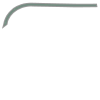

In [156]:
rel_count_zone

In [141]:
npcoords = np.array(coords) # convert to array

(27.952, 27.957)

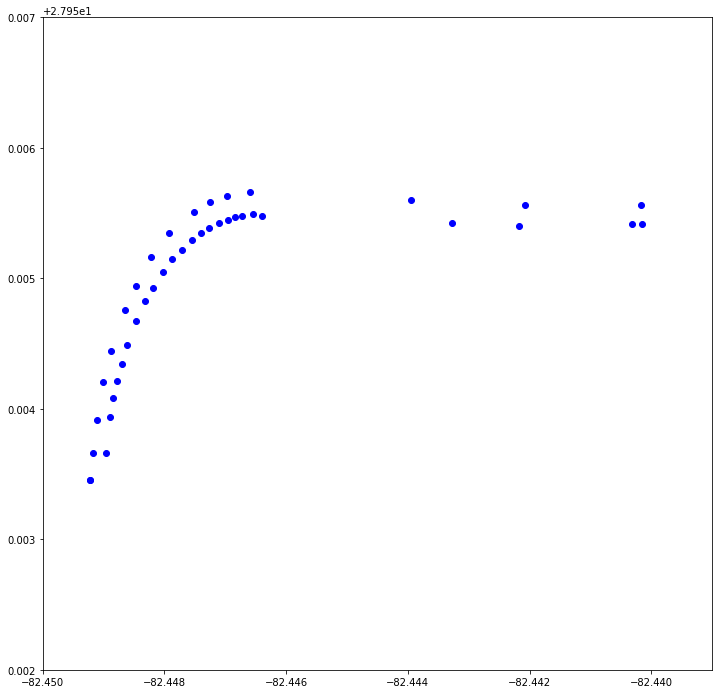

In [154]:
# visualize coords
fig, ax = plt.subplots(figsize=(12,12))
#street_map.plot(ax=ax, alpha = .4, color = 'grey')
plt.scatter(x=npcoords[:,0],y=npcoords[:,1], color='blue', marker="o")
plt.xlim([-82.45,-82.439])
plt.ylim([27.952,27.957])

In [57]:
def is_within_count_zone(row):
    coords = [[-82.448085,27.9552475],[-82.4479482,27.9550935],[-82.447755,27.9552048],[-82.4474841,27.955328],[-82.447122,27.9554394],[-82.4471542,27.9555981],[-82.4473393,27.9555626],[-82.4476182,27.9554773],[-82.4478409,27.9553825],[-82.448085,27.9552475]]
    rel_count_zone = Polygon(coords)
    return Point(row['long'], row['lat']).within(rel_count_zone)

In [ ]:
# 

In [58]:
df['count_zone'] = df.apply(is_within_count_zone, axis=1)

In [59]:
df['on_rel'] = df.apply(is_within_rel, axis=1)

In [60]:
df.groupby('count_zone').count()

,rsu_id,unix_epoch,datetime,car_id,lat,long,elev,speed,heading,geometry,on_rel
count_zone,,,,,,,,,,,
False,6186,6186,6186,6186,6186,6186,6186,6186,6186,6186,6186
True,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044


In [61]:
df.groupby('on_rel').count()

,rsu_id,unix_epoch,datetime,car_id,lat,long,elev,speed,heading,geometry,count_zone
on_rel,,,,,,,,,,,
False,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980
True,5250,5250,5250,5250,5250,5250,5250,5250,5250,5250,5250


In [62]:
df.query('on_rel == True & heading > 15000 & heading < 23000').groupby(pd.Grouper(key='datetime', freq='Min'))['car_id'].nunique()

datetime
2019-11-05 08:00:00     4
2019-11-05 08:01:00     9
2019-11-05 08:02:00     8
2019-11-05 08:03:00     7
2019-11-05 08:04:00     6
2019-11-05 08:05:00     5
2019-11-05 08:06:00     7
2019-11-05 08:07:00     8
2019-11-05 08:08:00    11
2019-11-05 08:09:00     8
2019-11-05 08:10:00     5
2019-11-05 08:11:00     7
2019-11-05 08:12:00     5
2019-11-05 08:13:00     5
2019-11-05 08:14:00     2
2019-11-05 08:15:00     2
2019-11-05 08:16:00     3
2019-11-05 08:17:00     1
2019-11-05 08:18:00     1
2019-11-05 08:19:00     2
2019-11-05 08:20:00     2
2019-11-05 08:21:00     2
2019-11-05 08:22:00     2
2019-11-05 08:23:00     4
2019-11-05 08:24:00     3
2019-11-05 08:25:00     5
2019-11-05 08:26:00     4
2019-11-05 08:27:00     6
2019-11-05 08:28:00     5
2019-11-05 08:29:00     3
2019-11-05 08:30:00     4
2019-11-05 08:31:00     7
2019-11-05 08:32:00     6
2019-11-05 08:33:00     4
2019-11-05 08:34:00     2
2019-11-05 08:35:00     1
2019-11-05 08:36:00     1
2019-11-05 08:37:00     0
201

In [63]:
df.query('count_zone == True').groupby(pd.Grouper(key='datetime', freq='Min'))['car_id'].nunique()

datetime
2019-11-05 08:01:00    2
2019-11-05 08:02:00    3
2019-11-05 08:03:00    2
2019-11-05 08:04:00    2
2019-11-05 08:05:00    0
2019-11-05 08:06:00    1
2019-11-05 08:07:00    2
2019-11-05 08:08:00    0
2019-11-05 08:09:00    2
2019-11-05 08:10:00    3
2019-11-05 08:11:00    4
2019-11-05 08:12:00    1
2019-11-05 08:13:00    0
2019-11-05 08:14:00    2
2019-11-05 08:15:00    2
2019-11-05 08:16:00    0
2019-11-05 08:17:00    1
2019-11-05 08:18:00    1
2019-11-05 08:19:00    0
2019-11-05 08:20:00    0
2019-11-05 08:21:00    1
2019-11-05 08:22:00    2
2019-11-05 08:23:00    2
2019-11-05 08:24:00    1
2019-11-05 08:25:00    1
2019-11-05 08:26:00    1
2019-11-05 08:27:00    2
2019-11-05 08:28:00    0
2019-11-05 08:29:00    1
2019-11-05 08:30:00    2
2019-11-05 08:31:00    1
2019-11-05 08:32:00    2
2019-11-05 08:33:00    2
2019-11-05 08:34:00    0
2019-11-05 08:35:00    0
2019-11-05 08:36:00    0
2019-11-05 08:37:00    0
2019-11-05 08:38:00    0
2019-11-05 08:39:00    2
2019-11-05 08:40

In [64]:
df.query('on_rel == True & elev > 19663').describe()

,rsu_id,unix_epoch,lat,long,elev,speed,heading
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df

,rsu_id,unix_epoch,datetime,car_id,lat,long,elev,speed,heading,geometry,count_zone,on_rel
15827,1,1572959887,2019-11-05 08:18:07,B71D2F,27.950971,-82.445560,-214,913,100,POINT (-82.44556 27.95097),False,False
15842,1,1572959891,2019-11-05 08:18:11,B71D2F,27.951626,-82.445538,-217,995,132,POINT (-82.44554 27.95163),False,False
15848,1,1572959893,2019-11-05 08:18:13,B71D2F,27.951992,-82.445525,-218,1031,184,POINT (-82.44553 27.95199),False,False
15862,1,1572959894,2019-11-05 08:18:14,B71D2F,27.952254,-82.445516,-219,1033,168,POINT (-82.44552 27.95225),False,False
15870,1,1572959895,2019-11-05 08:18:15,B71D2F,27.952423,-82.445509,-219,1041,158,POINT (-82.44551 27.95242),False,False
15873,1,1572959896,2019-11-05 08:18:16,B71D2F,27.952552,-82.445504,-217,1026,149,POINT (-82.44550 27.95255),False,False
15884,1,1572959897,2019-11-05 08:18:17,B71D2F,27.952739,-82.445497,-217,1029,208,POINT (-82.44550 27.95274),False,False
15898,1,1572959898,2019-11-05 08:18:18,B71D2F,27.952925,-82.445488,-217,1021,213,POINT (-82.44549 27.95292),False,False
15912,1,1572959899,2019-11-05 08:18:19,B71D2F,27.953128,-82.445480,-217,1020,153,POINT (-82.44548 27.95313),False,False
15920,1,1572959900,2019-11-05 08:18:20,B71D2F,27.953285,-82.445474,-216,1018,146,POINT (-82.44547 27.95328),False,False


## Geo Referencing

In [32]:
section1_elev = Polygon([[-82.4458091,27.9556443],[-82.4458171,27.9554808],[-82.4450728,27.9554631],[-82.4446692,27.9554595],[-82.4443258,27.95545],[-82.4440415,27.9554382],[-82.4437425,27.9554335],[-82.4433723,27.9554275],[-82.4430142,27.9554157],[-82.4426682,27.9554074],[-82.4424925,27.955405],[-82.4421184,27.9553979],[-82.4420339,27.9553979],[-82.4413499,27.9554027],[-82.4405137,27.9554163],[-82.4405151,27.9555732],[-82.4414525,27.9555596],[-82.4420352,27.9555543],[-82.4427983,27.9555715],[-82.4434125,27.9555851],[-82.4438008,27.9555952],[-82.4443272,27.9556106],[-82.444875,27.9556218],[-82.4453659,27.9556331],[-82.4458091,27.9556443]])

In [30]:
section2 = Polygon([[-802.4475056,27.9555152],[-802.4474412,27.9553541],[-802.4472159,27.9554062],[-802.4469209,27.9554489],[-802.4466687,27.955482],[-802.4463362,27.9554868],[-802.4458855,27.9554631],[-802.4452257,27.9554631],[-802.4450004,27.9554489],[-802.4449468,27.9556147],[-802.4459016,27.9556479],[-802.4465561,27.9556763],[-802.4469155,27.9556573],[-802.4472374,27.9556005],[-802.4475056,27.9555152]])

In [34]:
section3_direction = Polygon([[-82.449239,27.9523528],[-82.4488916,27.9523534],[-82.4489191,27.9524032],[-82.4489345,27.9524831],[-82.4489406,27.9525927],[-82.448956,27.9527834],[-82.4489875,27.9530565],[-82.4489989,27.9531453],[-82.4489882,27.9536127],[-82.4489272,27.9538988],[-82.4488501,27.9541085],[-82.4487703,27.9542684],[-82.4487072,27.9543898],[-82.4488715,27.9544496],[-82.448952,27.9543057],[-82.4490257,27.954141],[-82.4490928,27.953958],[-82.4491357,27.9537916],[-82.4491652,27.9536352],[-82.4491934,27.9534587],[-82.4492524,27.9529238],[-82.4492577,27.9528196],[-82.4492497,27.952803],[-82.4492658,27.9526922],[-82.4493328,27.9525678],[-82.4494006,27.9524748],[-82.4494717,27.9524115],[-82.4495186,27.9523765],[-82.4494998,27.9523398],[-82.449239,27.9523528]])

In [37]:
df = df.drop(['Unnamed: 0', 'count_zone', 'on_rel'], axis=1)

In [38]:
df

,rsu_id,unix_epoch,datetime,car_id,lat,long,elev,speed,heading
0,1,1572959887,2019-11-05 08:18:07,B71D2F,27.950971,-82.445560,-214,913,100
1,1,1572959891,2019-11-05 08:18:11,B71D2F,27.951626,-82.445538,-217,995,132
2,1,1572959893,2019-11-05 08:18:13,B71D2F,27.951992,-82.445525,-218,1031,184
3,1,1572959894,2019-11-05 08:18:14,B71D2F,27.952254,-82.445516,-219,1033,168
4,1,1572959895,2019-11-05 08:18:15,B71D2F,27.952423,-82.445509,-219,1041,158
...,...,...,...,...,...,...,...,...,...
7225,1,1572960339,2019-11-05 08:25:39,B74BBA,27.952881,-82.445564,-159,583,14562
7226,1,1572960340,2019-11-05 08:25:40,B74BBA,27.952787,-82.445568,-159,522,14586
7227,1,1572960360,2019-11-05 08:26:00,B74BBA,27.952347,-82.445591,-160,433,14541
7228,1,1572960361,2019-11-05 08:26:01,B74BBA,27.952339,-82.445591,-160,435,14537
